In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

In [57]:
df = pd.read_csv("data/orders.csv")
df = df.loc[df.city == 'London']

In [58]:
df.head().T

,0,1,2,3,4
customer_db_id,54478736d4cde82247f1345f,54478736d4cde82247f1345f,54478fa4d3cde8d17ca5e4db,54478fa4d3cde8d17ca5e4db,5447eefcd3cde8cf7ca5e4eb
order_id,GB-A-69332,GB-R-37069,GB-A-74327,GB-P-85553,GB-D-01300
fac_name,NaN,NaN,NaN,NaN,NaN
order_db_id,54478738d2cde8320d9b58d2,5447883bd4cde82147f1345c,54478fa5d4cde82847f1345e,551931f5d2cde8e8582d7248,5447eeffd4cde82247f1346f
order_lat,51.5163,51.5163,51.5163,51.5163,51.5163
order_lng,-0.120728,-0.120728,-0.120765,-0.134493,-0.120728
pickup_timeslot_from_datetime,2014-10-22 12:30:00,2014-10-22 12:30:00,2014-10-27 09:30:00,2015-03-31 09:30:00,2014-10-22 19:30:00
pickup_timeslot_to_datetime,2014-10-22 13:00:00,2014-10-22 13:00:00,2014-10-27 10:00:00,2015-03-31 10:00:00,2014-10-22 20:00:00
pickup_zip,WC2B 5,WC2B 5,WC2B 5,W1D 1BS,WC2B 5
order_state,canceled,canceled,canceled,completed,canceled


In [59]:
df['churned'] = [True if x >= 1 else False for x in df.churn_factor]
df.groupby(['churned'])['customer_db_id'].nunique()

churned
False     3672
True     35001
Name: customer_db_id, dtype: int64

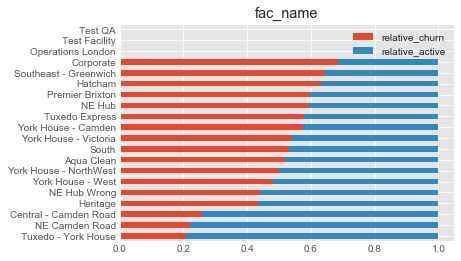

In [60]:
df_churn = df.loc[(df.churned)]
df_active = df.loc[~(df.churned)]

df_churn = df_churn.groupby('fac_name')['customer_db_id'].nunique() / df_churn.shape[0]
df_active = df_active.groupby('fac_name')['customer_db_id'].nunique() / df_active.shape[0]
df_diff = df_churn - df_active
df_all = pd.concat([df_churn, df_active, df_diff], 
              axis=1, keys=['churn', 'active', 'diff'], sort=True)
df_all['total'] = df_all['churn'] + df_all['active']
df_all['relative_churn'] = df_all['churn'] / df_all['total']
df_all['relative_active'] = df_all['active'] / df_all['total']
df_all = df_all.sort_values('relative_churn', ascending=True)
df_all[['relative_churn', 'relative_active']].plot(kind='barh', title='fac_name', stacked=True)

In [36]:
sns.barplot(data=a, x='customer_db_id', y='fac_name', hue='churned')

ValueError: Could not interpret input 'fac_name'